In [1]:
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'

matplotlib.rcParams.update({'font.size': 14})

In [2]:
def feature_distribution(feature, bins_val=50):
    feature_mean = round(df[feature].mean(), 2)
    feature_median = df[feature].median()
    feature_mode = df[feature].mode()[0]

    plt.figure(figsize = (12, 6))

    sns.distplot(df[feature], bins=bins_val)

    y = np.linspace(0, 0.000007, 10)
    plt.plot([feature_mean] * 10, y, label='mean',  linewidth=4)
    plt.plot([feature_median] * 10, y, label='median',  linewidth=4)
    plt.plot([feature_mode] * 10, y, label='mode', linewidth=4)

    plt.title('Distribution of ' + feature)
    plt.legend(loc='upper right')
    plt.show()
    print(f"\tMean= {feature_mean}    Median= {feature_median}    Mode= {feature_mode}")
    return

In [3]:
def feature_label(feature, label):
    """ Функция создания метки, где параметры: 
        feature - признак, а label -метка"""

    feature = feature + '_' + label
    if not feature in set(df.columns):
        # print(f'Новый признак: {feature}')
        df[feature] = 0
        df[feature] = df[feature].astype(np.int8)
    return

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

In [5]:
TRAIN_DATASET_PATH = ('C:\\Users\\4а\\train.csv')
TEST_DATASET_PATH = ('C:\\Users\\4а\\test.csv')

# Загрузка данных #

Описание датасета

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - комнаты

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели

Social_1, Social_2, Social_3 - социальные показатели

Healthcare_1, Helthcare_2 - показатели местности (охрана здоровья)

Shops_1, Shops_2 - наличие магазинов, торговых центров

Price - цена квартиры - (целевой признак)

In [6]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


In [8]:
df.shape

(10000, 20)

In [9]:
test_df.shape

(5000, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

# Оптимизация памяти #

In [11]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [12]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [14]:
df['Id'] = df['Id'].astype('category')  # признак Id уникален, поэтому я не буду использовать его для анализа
df['DistrictId'] = df['DistrictId'].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  category
 1   DistrictId     10000 non-null  category
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

# EDA #

Исправления выбросов

Заполнения NaN

Идей для генерации новых фич

# Наша целевая переменная price #

In [16]:
df['Price'].describe()

count     10000.000000
mean     214138.937500
std       92872.273438
min       59174.777344
25%      153872.628906
50%      192269.648438
75%      249135.460938
max      633233.437500
Name: Price, dtype: float64

Работаем с целевой переменной

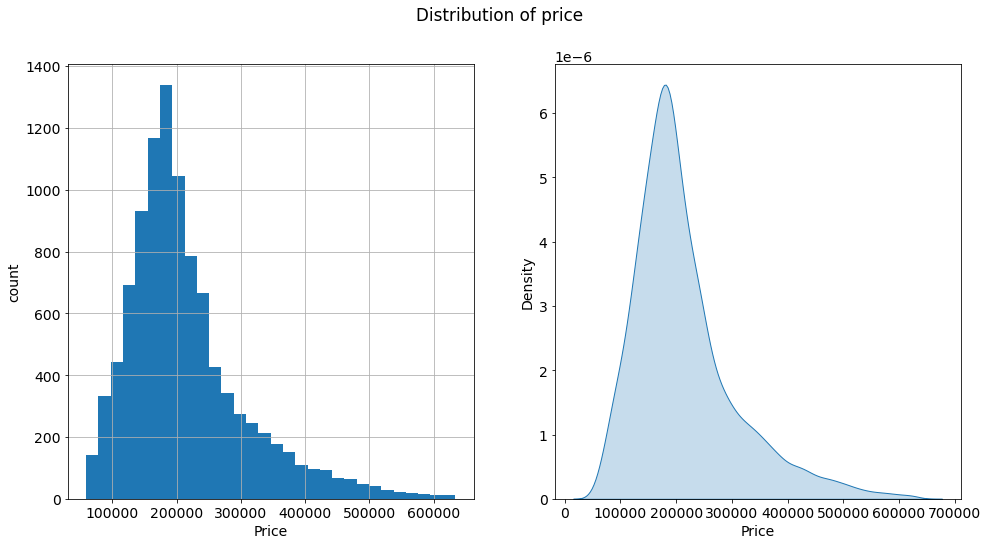

In [17]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=False, bins=30)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of price')
plt.show()

Рассмотрим модальное, медианное и среднее значения

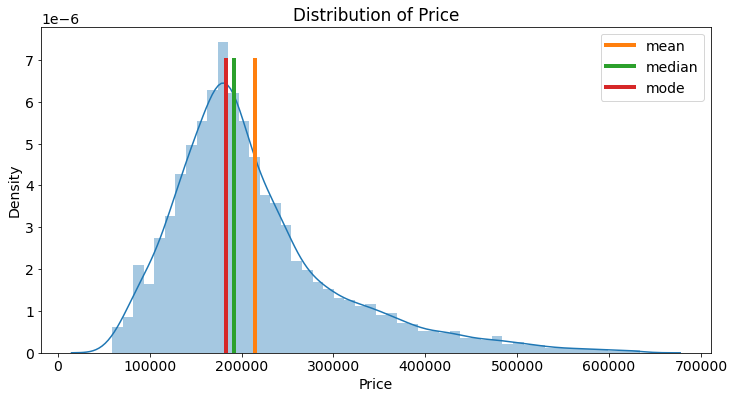

	Mean= 214138.94    Median= 192269.65625    Mode= 182938.078125


In [18]:
feature_distribution('Price')

Распределение целевой переменной - адекватно

Количественные переменные

In [19]:
df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [20]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750


LifeSquare и Healthcare_1 есть пропуски.

В признаках Rooms, KitchenSquare, HouseFloor, Ecology_1, Social_1, Social_3, Heathcare_1, Helthcare_2, Shops_1 есть нули, возможно пропуски.

LifeSquare, KitchenSquare, HouseFloor, HouseYear, Social_2, Social_3, Shops_1 максимальные показатели велики, скорее всего мы говорим о выбросах.

In [21]:
df.select_dtypes(include='category').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [22]:
df['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
199      1
117      1
205      1
207      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [23]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [24]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [25]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

# Обработка выбросов #

Что можно делать с ними?

Выкинуть эти данные (только на трейне, на тесте ничего не выкидываем)

Заменять выбросы разными методами (медианы, средние значения, np.clip и т.д.)

Делать/не делать дополнительную фичу

Ничего не делать

In [26]:
df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Rooms

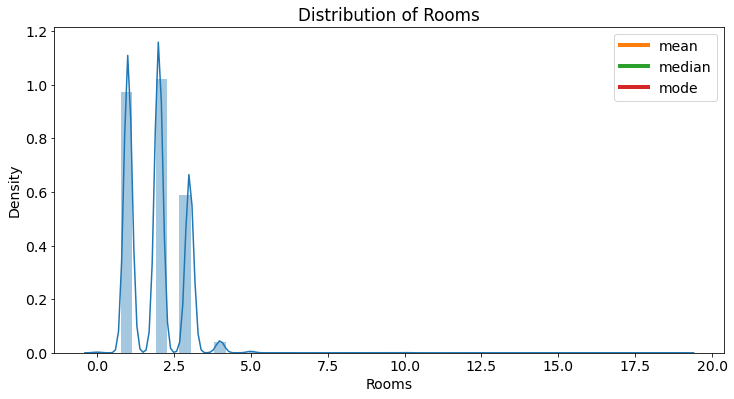

	Mean= 1.89    Median= 2.0    Mode= 2.0


In [27]:
feature_distribution('Rooms')

0 явно ошибочное значение для комнат. 

6 значение встречается редко, можно заменить

In [28]:
df['Rooms_outlier'] = 0 # 0 для комнат от 1 до 5, метка 1 для комнат 0 и больше 6
df.loc[(df['Rooms'] == 0) | (df['Rooms'] >= 6), 'Rooms_outlier'] = 1
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,Rooms_outlier
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,...,B,11,3097,0,NaN,0,0,B,305018.875000,0
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,...,B,30,6207,1,1183.0,1,0,B,177734.546875,0
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,...,B,33,5261,0,240.0,3,1,B,282078.718750,0
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,...,B,1,264,0,NaN,0,1,B,168106.000000,0
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,B,33,8667,2,NaN,0,6,B,343995.093750,0


In [29]:
df.loc[df['Rooms'] >= 6, 'Rooms'] = df['Rooms'].quantile(.975)  
df.loc[df['Rooms'] == 0, 'Rooms'] = df['Rooms'].quantile(.025)

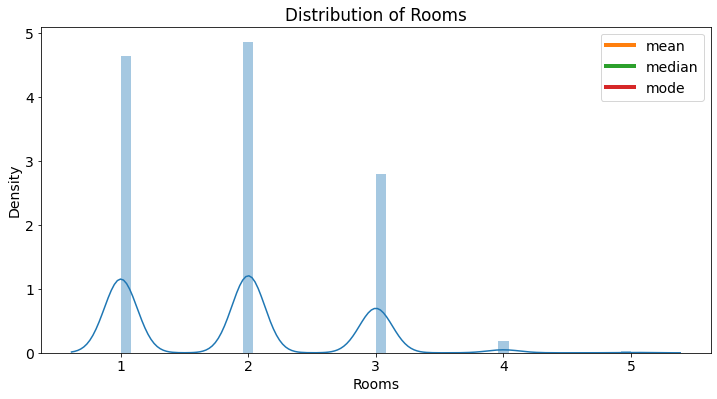

	Mean= 1.89    Median= 2.0    Mode= 2.0


In [30]:
feature_distribution('Rooms')

In [31]:
df['Rooms'].value_counts()

2.0    3880
1.0    3713
3.0    2239
4.0     150
5.0      18
Name: Rooms, dtype: int64

Houseyear

In [32]:
df['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int32

Все что больше 2020 года, выбросы, которые мы заменим

In [33]:
df.loc[df['HouseYear'] > 2020, 'HouseYear'] = 2020

In [34]:
df['HouseYear'].sort_values(ascending=False)

7246    2020
2350    2020
8296    2020
3171    2020
3196    2020
        ... 
7610    1916
6250    1914
2066    1912
2795    1912
6794    1910
Name: HouseYear, Length: 10000, dtype: int32

Square, LifeSquare, KitchenSquare - признаки площади, присутствует взаимосвязь 

In [35]:
df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

,Square,LifeSquare,KitchenSquare
count,10000.000000,7887.000000,10000.000000
mean,56.315720,37.199665,6.273300
std,21.058716,86.241219,28.560839
min,1.136859,0.370619,0.000000
25%,41.774879,22.769833,1.000000
50%,52.513309,32.781261,6.000000
75%,65.900627,45.128803,9.000000
max,641.065186,7480.592285,2014.000000


У многих признаков есть выбросы и пропуски, надо решить проблему

In [36]:
df[['Square', 'LifeSquare', 'KitchenSquare']].head()

,Square,LifeSquare,KitchenSquare
0,115.027313,NaN,10.0
1,39.832523,23.169222,8.0
2,78.342216,47.671970,10.0
3,40.409908,NaN,1.0
4,64.285065,38.562515,9.0


In [37]:
print(df['Square'].quantile(.025), df['Square'].quantile(.975))

32.10518369674683 100.90624904632566


In [38]:
condition = (df['Square'].isna()) | (df['Square'] > 210)
        
df.loc[condition, 'Square'] = df['Square'].median()

df.loc[df['Square'] < 0, 'Square'] = 0

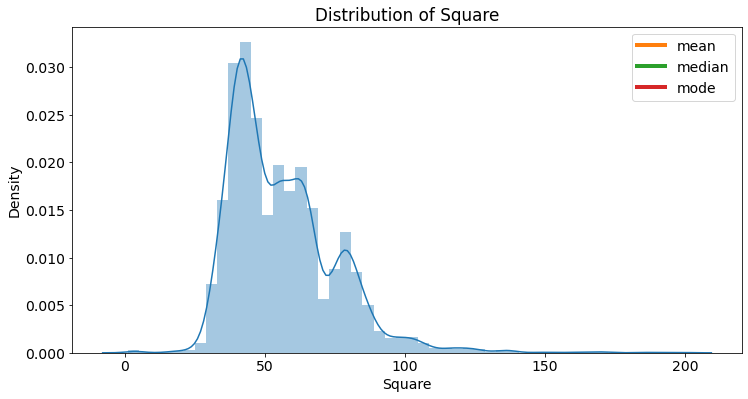

	Mean= 56.13    Median= 52.513038635253906    Mode= 52.513309478759766


In [39]:
feature_distribution('Square')

При попытке решения проблемы KitchenSquare и LifeSquare существовала проблема, что при обработке выбросов и пропусков, заменив значения медианой, результаты меняются резко и получаются очень грубые закономерности

In [40]:
df['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

Мы обнаружили, что Kitchensquare > Square, что не может быть правдой

In [41]:
df.loc[(df['KitchenSquare'] > df['Square']), 'Square'].count() 

4

In [42]:
df['KitchenSquare'].quantile(.975), df['KitchenSquare'].quantile(.025)

(13.0, 0.0)

In [43]:
condition = (df['KitchenSquare'].isna()) \
             | (df['KitchenSquare'] > df['KitchenSquare'].quantile(.975))
        
df.loc[condition, 'KitchenSquare'] = df['KitchenSquare'].median()

df.loc[df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

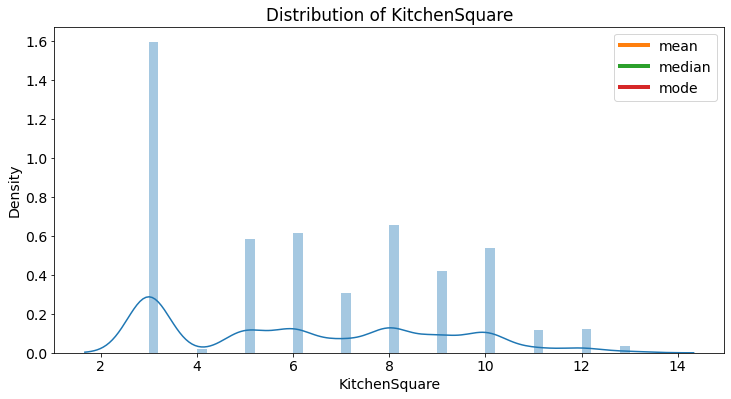

	Mean= 6.24    Median= 6.0    Mode= 3.0


In [44]:
feature_distribution('KitchenSquare')

Мы обнаружили, что Lifesquare > Square, что не может быть правдой

In [45]:
df['LifeSquare_nan'] = df['LifeSquare'].isna() * 1  
df.loc[df['LifeSquare_nan'] == 1, 'LifeSquare'] = 0  
df['LifeSquare'].isna().sum()

0

In [46]:
df[['LifeSquare', 'Square', 'KitchenSquare', 'Price']].sort_values(by = 'LifeSquare', ascending=False).head(20)

,LifeSquare,Square,KitchenSquare,Price
8000,7480.592285,81.694420,3.0,217357.500000
9229,638.163208,52.513309,10.0,133529.687500
5183,461.463623,78.059334,10.0,394253.312500
7010,410.639740,52.513309,10.0,90470.429688
357,263.542023,48.449875,5.0,141780.234375
1906,233.949310,52.513309,6.0,455264.875000
7644,211.231125,52.513309,3.0,302211.250000
1776,201.627365,200.334534,6.0,528560.500000
5283,174.837082,174.649521,6.0,232766.187500
8872,170.713654,169.509933,3.0,200800.671875


In [47]:
df['LifeSquare'].quantile(.975), df['KitchenSquare'].quantile(.025)

(78.38594131469725, 3.0)

In [48]:
# Здесь решил пройтись вручную, ибо квантили дают не очень точный результат
feature_label('LifeSquare', 'outlier')
df.loc[df['LifeSquare'] > 210, 'LifeSquare_outlier'] = 1 
df.loc[df['LifeSquare'] > 210, 'LifeSquare'] = 0 

In [49]:
df.loc[(df['LifeSquare'] > df['Square']), 'Square'].count() 

478

In [50]:
feature_label('Square', 'swap')
df.loc[(df['LifeSquare'] > df['Square']), 'Square_swap'] = 1
df.loc[(df['Square_swap'] == 1), ['Square', 'LifeSquare']] = df.loc[(df['Square_swap'] == 1), ['LifeSquare', 'Square']].values

In [51]:
df.loc[(df['LifeSquare'] > df['Square']), 'Square'].count() 

0

In [52]:
feature_label('LifeSquare', 'outlier')
condition = (df['LifeSquare'] == 0) | (~(df['LifeSquare'] < df['Square'] - df['KitchenSquare']) & (df['Square'] - df['KitchenSquare']> 0))
df.loc[condition, 'LifeSquare_outlier'] = 1
df.loc[condition, 'LifeSquare'] = df['Square'] - df['KitchenSquare']

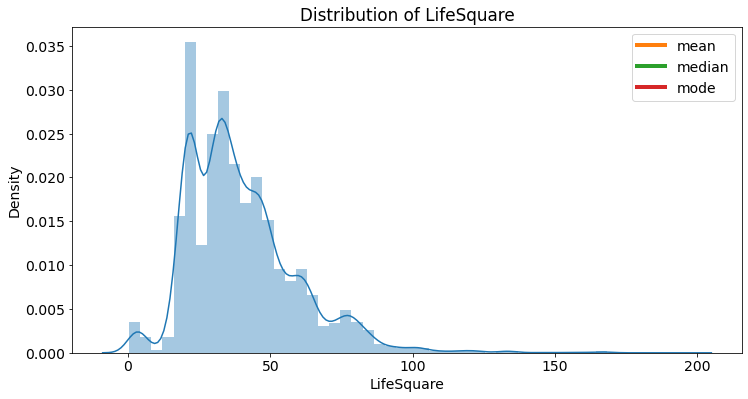

	Mean= 39.92    Median= 35.998260498046875    Mode= 33.85965347290039


In [53]:
feature_distribution('LifeSquare')

HouseFloor, Floor

Пропусков у признаков не имеется


In [54]:
df['HouseFloor'].sort_values()

2768      0.0
1928      0.0
5104      0.0
6870      0.0
6860      0.0
        ...  
5031     48.0
4987     48.0
746      99.0
4657     99.0
1678    117.0
Name: HouseFloor, Length: 10000, dtype: float32

In [55]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int8)

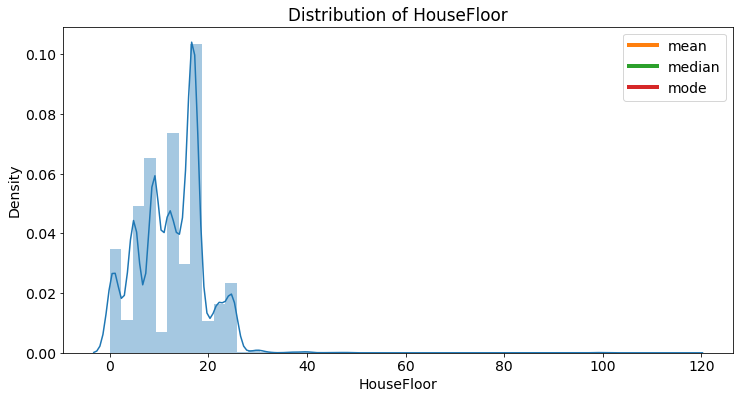

	Mean= 12.61    Median= 13.0    Mode= 17.0


In [56]:
feature_distribution('HouseFloor')

In [57]:
df.loc[df['HouseFloor'] == 0, ['HouseFloor', 'Floor']]

,HouseFloor,Floor
24,0.0,2
152,0.0,14
159,0.0,6
186,0.0,8
229,0.0,15
...,...,...
9889,0.0,2
9931,0.0,14
9940,0.0,8
9950,0.0,3


Нулевые значения дома заменим на медианное значение. Сделаем упрощение, что количествоэтажей не больше 50, большие заменим на 50

In [58]:
df['HouseFloor_outlier'] = 0
df.loc[(df['HouseFloor'] == 0) | (df['HouseFloor'] > 50), 'HouseFloor_outlier'] = 1

housefloor_median = df['HouseFloor'].median()
df.loc[(df['HouseFloor'] == 0) & (df['Floor'] < housefloor_median), 'HouseFloor'] = housefloor_median
df.loc[(df['HouseFloor'] == 0), 'HouseFloor'] = df.loc[(df['HouseFloor'] == 0), 'Floor']

df.loc[(df['HouseFloor'] > 50), 'HouseFloor'] = 50

In [59]:
(df['Floor'] > df['HouseFloor']).sum()

1556

In [60]:
df.loc[df['Floor'] > df['HouseFloor'], 'HouseFloor_outlier'] = 1

HouseFloor < Floor не может быть , поэтому заменим значения

In [61]:
df['Floor_swap'] = 0
df['Floor_swap'] = df['Floor_swap'].astype(np.int8)
df.loc[(df['HouseFloor'] < df['Floor']), 'Floor_swap'] = 1
df.loc[(df['Floor_swap'] == 1), ['HouseFloor', 'Floor']] \
= df.loc[(df['Floor_swap'] == 1), ['Floor', 'HouseFloor']].values

In [62]:
(df['Floor'] > df['HouseFloor']).sum()

0

# Обработка оставшихся пропусков #

In [63]:
df.drop('Healthcare_1', axis=1, inplace=True)

In [64]:
df.isna().sum()

Id                    0
DistrictId            0
Rooms                 0
Square                0
LifeSquare            0
KitchenSquare         0
Floor                 0
HouseFloor            0
HouseYear             0
Ecology_1             0
Ecology_2             0
Ecology_3             0
Social_1              0
Social_2              0
Social_3              0
Helthcare_2           0
Shops_1               0
Shops_2               0
Price                 0
Rooms_outlier         0
LifeSquare_nan        0
LifeSquare_outlier    0
Square_swap           0
HouseFloor_outlier    0
Floor_swap            0
dtype: int64

In [65]:
class DataPreprocessing:
    """Подготовка исходных данных"""
    

    def __init__(self):
        """Параметры класса"""
        self.medians=None
        self.housefloor_median = None
        self.houseyear_median = None
        self.square_median = None
        self.rooms_quantile = None 
        self.square_quantile = None
        self.kitchen_square_quantile = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет медиан
        self.medians = X.median()
        self.housefloor_median = X['HouseFloor'].median()
        self.houseyear_median = X['HouseYear'].median()
        self.square_median = X['Square'].median()
        self.rooms_quantile975 = X['Rooms'].quantile(.975)
        self.rooms_quantile025 = X['Rooms'].quantile(.025)
        self.kitchen_square_quantile975 = X['KitchenSquare'].quantile(.975)
        self.kitchen_square_quantile025 = X['KitchenSquare'].quantile(.025)
        
    def transform(self, X):
        """Трансформация данных"""
        
        # Rooms
        X['Rooms_outlier'] = 0
        X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
        
        X.loc[(X['Rooms'] >= 6), 'Rooms'] = self.rooms_quantile975
        
        X.loc[X['Rooms'] == 0, 'Rooms'] = self.rooms_quantile025
        
        # HouseYear
        current_year = datetime.now().year
        
        X['HouseYear_outlier'] = 0
        X.loc[X['HouseYear'] > current_year, 'HouseYear_outlier'] = 1
        
        X.loc[X['HouseYear'] > current_year, 'HouseYear'] = current_year
        
        # Square, LifeSquare, KitchenSquare

        condition = (X['Square'].isna()) | (X['Square'] > 210)
        
        X.loc[condition, 'Square'] = X['Square'].median()

        X.loc[X['Square'] < 0, 'Square'] = 0
        
        condition = (X['KitchenSquare'].isna()) \
                    | (X['KitchenSquare'] > self.kitchen_square_quantile)
        
        X.loc[condition, 'KitchenSquare'] = self.medians['KitchenSquare']

        X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3
        
        X['LifeSquare_nan'] = X['LifeSquare'].isna() * 1  
        X.loc[X['LifeSquare_nan'] == 1, 'LifeSquare'] = 0  
        X['LifeSquare'].isna().sum()
        
        feature_label('Square', 'swap')
        X.loc[(X['LifeSquare'] > X['Square']), 'Square_swap'] = 1
        X.loc[(X['Square_swap'] == 1), ['Square', 'LifeSquare']] = X.loc[(X['Square_swap'] == 1), ['LifeSquare', 'Square']].values
        
        feature_label('LifeSquare', 'outlier')
        condition = (X['LifeSquare'] == 0) | (~(X['LifeSquare'] < X['Square'] - X['KitchenSquare']) & (X['Square'] - X['KitchenSquare']> 0))
        X.loc[condition, 'LifeSquare_outlier'] = 1
        X.loc[condition, 'LifeSquare'] = X['Square'] - X['KitchenSquare']
        
        # HouseFloor, Floor
        X['HouseFloor_outlier'] = 0
        X['HouseFloor_outlier'] = X['HouseFloor_outlier'].astype(np.int8)
        
        X.loc[(X['HouseFloor'] == 0) | (X['HouseFloor'] >50), 'HouseFloor_outlier'] = 1
        
        X.loc[(X['HouseFloor'] == 0) & (X['Floor'] < housefloor_median), 'HouseFloor'] \
        = self.housefloor_median
        X.loc[(X['HouseFloor'] == 0), 'HouseFloor'] = X.loc[(X['HouseFloor'] == 0), 'Floor']                                        
        
        X['Floor_swap'] = 0
        X['Floor_swap'] = X['Floor_swap'].astype(np.int8)
        X.loc[(X['HouseFloor'] < X['Floor']), 'Floor_swap'] = 1
        X.loc[(X['Floor_swap'] == 1), ['HouseFloor', 'Floor']] \
                 = X.loc[(X['Floor_swap'] == 1), ['Floor', 'HouseFloor']].values                                        
        
        # Healthcare_1
        if 'Healthcare_1' in X.columns:
            X.drop('Healthcare_1', axis=1, inplace=True)
        
        X.fillna(self.medians, inplace=True)
        
        return X

# Построение новых признаков #

Dummies

In [66]:
binary_to_numbers = {'A': 0, 'B': 1}

df['Ecology_2'] = df['Ecology_2'].replace(binary_to_numbers)
df['Ecology_3'] = df['Ecology_3'].replace(binary_to_numbers)
df['Shops_2'] = df['Shops_2'].replace(binary_to_numbers)

DistrictSize 
IsDistrictLarge 

In [67]:
district_size = df['DistrictId'].value_counts().reset_index()\
                    .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size['DistrictSize'] = district_size['DistrictSize'].astype(np.int16)
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [68]:
df = df.merge(district_size, on='DistrictId', how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Shops_1,Shops_2,Price,Rooms_outlier,LifeSquare_nan,LifeSquare_outlier,Square_swap,HouseFloor_outlier,Floor_swap,DistrictSize
0,11809,27,3.0,115.027313,105.027313,10.0,4.0,10.0,2014,0.075424,...,0,1,305018.875000,0,1,1,0,0,0,851
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,...,0,1,177734.546875,0,0,0,0,0,0,78
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,...,1,1,282078.718750,0,0,0,0,0,0,652
3,2352,1,1.0,40.409908,37.409908,3.0,10.0,22.0,1977,0.007122,...,1,1,168106.000000,0,1,1,0,0,0,652
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,...,6,1,343995.093750,0,0,0,0,0,0,89


In [69]:
(df['DistrictSize'] > 100).value_counts()

True     5069
False    4931
Name: DistrictSize, dtype: int64

In [70]:
df['IsDistrictLarge'] = (df['DistrictSize'] > 100).astype(np.int8)  

MedSqPriceByDistrict

In [71]:
med_sq_price_by_district = df.groupby(['DistrictId'])\
.agg({'Square': 'sum', 'Price': 'sum'}).rename(columns={'Price':'MedSqPriceByDistrict'})

med_sq_price_by_district.loc[:, 'MedSqPriceByDistrict']\
= med_sq_price_by_district['MedSqPriceByDistrict']\
                              / med_sq_price_by_district['Square']
med_sq_price_by_district.drop('Square', axis=1, inplace=True)
df = df.merge(med_sq_price_by_district, on='DistrictId', how='left')
df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,Rooms_outlier,LifeSquare_nan,LifeSquare_outlier,Square_swap,HouseFloor_outlier,Floor_swap,DistrictSize,IsDistrictLarge,MedSqPriceByDistrict
0,11809,27,3.0,115.027313,105.027313,10.0,4.0,10.0,2014,0.075424,...,305018.875000,0,1,1,0,0,0,851,1,2707.686279
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,...,177734.546875,0,0,0,0,0,0,78,0,3652.102051
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,...,282078.718750,0,0,0,0,0,0,652,1,3159.496094
3,2352,1,1.0,40.409908,37.409908,3.0,10.0,22.0,1977,0.007122,...,168106.000000,0,1,1,0,0,0,652,1,3159.496094
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,...,343995.093750,0,0,0,0,0,0,89,0,4176.484863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1260,61,2.0,49.090729,33.272625,6.0,3.0,12.0,1981,0.300323,...,119367.453125,0,0,0,0,0,0,118,1,4291.717285
9996,16265,27,2.0,64.307686,37.038422,9.0,13.0,13.0,1977,0.072158,...,199715.156250,0,0,0,0,1,0,851,1,2707.686279
9997,2795,178,1.0,29.648056,16.555363,5.0,3.0,5.0,1958,0.460556,...,165953.906250,0,0,0,0,0,0,7,0,5097.301758
9998,14561,21,1.0,32.330292,22.326870,5.0,3.0,9.0,1969,0.194489,...,171842.406250,0,0,0,0,0,0,165,1,4062.599854


MedPriceByFloorYear

In [72]:
def floor_to_cat(X):
    """
    категория от этажа квартиры
    
    Floor <= 3, floor_cat = 1  
    Floor > 3 & Floor <= 5, floor_cat = 2
    Floor > 5 & Floor <= 9, floor_cat = 3
    Floor > 9 & Floor <= 15, floor_cat = 4
    Floor > 15, floor_cat = 5

    """

    bins = [0, 3, 5, 9, 15, X['Floor'].max()]
    X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)
    
    X['floor_cat'].fillna(-1, inplace=True)
    return X


def year_to_cat(X):
    """
     категория от года постройки.
    
    HouseYear <= 1941, year_cat = 1
    HouseYear > 1941 & HouseYear <= 1945, year_cat = 2
    HouseYear > 1945 & HouseYear <= 1980, year_cat = 3
    HouseYear > 1980 & HouseYear <= 2000, year_cat = 4
    HouseYear > 2000 & HouseYear <= 2010, year_cat = 5
    HouseYear > 2010, year_cat = 6

    """
    
    bins = [0, 1941, 1945, 1980, 2000, 2010, X['HouseYear'].max()]
    X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)
    
    X['year_cat'].fillna(-1, inplace=True)
    return X

In [73]:
df = year_to_cat(df)
df = floor_to_cat(df)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,LifeSquare_nan,LifeSquare_outlier,Square_swap,HouseFloor_outlier,Floor_swap,DistrictSize,IsDistrictLarge,MedSqPriceByDistrict,year_cat,floor_cat
0,11809,27,3.0,115.027313,105.027313,10.0,4.0,10.0,2014,0.075424,...,1,1,0,0,0,851,1,2707.686279,5,1
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,...,0,0,0,0,0,78,0,3652.102051,2,2
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,...,0,0,0,0,0,652,1,3159.496094,3,0
3,2352,1,1.0,40.409908,37.409908,3.0,10.0,22.0,1977,0.007122,...,1,1,0,0,0,652,1,3159.496094,2,3
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,...,0,0,0,0,0,89,0,4176.484863,2,4


In [74]:
med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
med_price_by_floor_year.head()

,year_cat,floor_cat,MedPriceByFloorYear
0,0,0,380359.12500
1,0,1,324303.81250
2,0,2,422668.37500
3,0,3,274992.46875
4,1,0,467230.53125


In [75]:
df = df.merge(med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,LifeSquare_outlier,Square_swap,HouseFloor_outlier,Floor_swap,DistrictSize,IsDistrictLarge,MedSqPriceByDistrict,year_cat,floor_cat,MedPriceByFloorYear
0,11809,27,3.0,115.027313,105.027313,10.0,4.0,10.0,2014,0.075424,...,1,0,0,0,851,1,2707.686279,5,1,161744.500000
1,3013,22,1.0,39.832523,23.169222,8.0,7.0,8.0,1966,0.118537,...,0,0,0,0,78,0,3652.102051,2,2,192213.968750
2,8215,1,3.0,78.342216,47.671970,10.0,2.0,17.0,1988,0.025609,...,0,0,0,0,652,1,3159.496094,3,0,205210.062500
3,2352,1,1.0,40.409908,37.409908,3.0,10.0,22.0,1977,0.007122,...,1,0,0,0,652,1,3159.496094,2,3,184303.156250
4,13866,94,2.0,64.285065,38.562515,9.0,16.0,16.0,1972,0.282798,...,0,0,0,0,89,0,4176.484863,2,4,177875.703125


In [76]:
class FeatureGenerator():
    """Генерация новых фич"""
    
    def __init__(self):
        self.DistrictId_counts = None
        self.binary_to_numbers = None
        self.med_sq_price_by_district = None
        self.med_sq_price_by_district_median = None
        self.med_price_by_floor_year = None
        self.med_price_by_floor_year_median = None
        self.house_year_max = None
        self.floor_max = None
        
    def fit(self, X, y=None):
        
        X = X.copy()
        
        # Binary features
        self.binary_to_numbers = {'A': 0, 'B': 1}
        
        # DistrictID
        self.district_size = X['DistrictId'].value_counts().reset_index() \
                               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})
                
        ## District, Rooms
        df = X.copy()
        
        if y is not None:
            df['Price'] = y.values
            
            self.med_sq_price_by_district = df.groupby(['DistrictId'])\
            .agg({'Square': 'sum', 'Price': 'sum'}).rename(columns={'Price':'MedSqPriceByDistrict'})
            
            self.med_sq_price_by_district.loc[:, 'MedSqPriceByDistrict']\
            = self.med_sq_price_by_district['MedSqPriceByDistrict']\
                              / self.med_sq_price_by_district['Square']
            
            self.med_sq_price_by_district.drop('Square', axis=1, inplace=True)           
            self.med_sq_price_by_district_median = self.med_sq_price_by_district['MedSqPriceByDistrict'].median()
            
        ## floor, year
        if y is not None:
            self.floor_max = df['Floor'].max()
            self.house_year_max = df['HouseYear'].max()
            df['Price'] = y.values
            df = self.floor_to_cat(df)
            df = self.year_to_cat(df)
            self.med_price_by_floor_year = df.groupby(['year_cat', 'floor_cat'], as_index=False).agg({'Price':'median'}).\
                                            rename(columns={'Price':'MedPriceByFloorYear'})
            self.med_price_by_floor_year_median = self.med_price_by_floor_year['MedPriceByFloorYear'].median()
        

        
    def transform(self, X):
        
        # Binary features
        X['Ecology_2'] = X['Ecology_2'].map(self.binary_to_numbers)  # self.binary_to_numbers = {'A': 0, 'B': 1}
        X['Ecology_2'] = X['Ecology_2'].astype(np.int8)
        X['Ecology_3'] = X['Ecology_3'].map(self.binary_to_numbers)
        X['Ecology_3'] = X['Ecology_3'].astype(np.int8)
        X['Shops_2'] = X['Shops_2'].map(self.binary_to_numbers)
        X['Shops_2'] = X['Shops_2'].astype(np.int8)
        
        # DistrictId, IsDistrictLarge
        X = X.merge(self.district_size, on='DistrictId', how='left')
        
        X['DistrictSize_nan'] = X['DistrictSize'].isna() * 1
        X['DistrictSize'].fillna(5, inplace=True)
        X['IsDistrictLarge'] = (X['DistrictSize'] > 100).astype(np.int16)
        
        # More categorical features
        X = self.floor_to_cat(X)  # + признак floor_cat
        X = self.year_to_cat(X)   # + признак year_cat
        
        if self.med_sq_price_by_district is not None:
            X = X.merge(self.med_sq_price_by_district, on='DistrictId', how='left')
            X.loc[X['MedSqPriceByDistrict'].isna(), 'MedSqPriceByDistrict'] = self.med_sq_price_by_district_median
            
        if self.med_price_by_floor_year is not None:
            X = X.merge(self.med_price_by_floor_year, on=['year_cat', 'floor_cat'], how='left')
            X.loc[X['MedPriceByFloorYear'].isna(), 'MedPriceByFloorYear'] = self.med_price_by_floor_year_median
        
        return X
    
    def floor_to_cat(self, X):
        bins = [0, 3, 5, 9, 15, self.floor_max]
        X['floor_cat'] = pd.cut(X['Floor'], bins=bins, labels=False)

        X['floor_cat'].fillna(-1, inplace=True) 
        return X
     
    def year_to_cat(self, X):
        bins = [0, 1941, 1945, 1980, 2000, 2010, self.house_year_max]
        X['year_cat'] = pd.cut(X['HouseYear'], bins=bins, labels=False)

        X['year_cat'].fillna(-1, inplace=True)
        return X
            
    

# Отбор признаков #

In [77]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Rooms_outlier',
 'LifeSquare_nan',
 'LifeSquare_outlier',
 'Square_swap',
 'HouseFloor_outlier',
 'Floor_swap',
 'DistrictSize',
 'IsDistrictLarge',
 'MedSqPriceByDistrict',
 'year_cat',
 'floor_cat',
 'MedPriceByFloorYear']

In [78]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1']

new_feature_names = ['DistrictSize', 'IsDistrictLarge', 'MedSqPriceByDistrict', 'MedPriceByFloorYear']

target_name = 'Price'

# Разбиение на train и test #

In [79]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

X = train_df.drop(columns=target_name)
y = train_df[target_name]

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%
Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.21 MB
Decreased by 70.3%


In [80]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=21)

In [81]:
preprocessor = DataPreprocessing()
preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_valid = preprocessor.transform(X_valid)
test_df = preprocessor.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((7000, 25), (3000, 25), (5000, 25))

In [82]:
features_gen = FeatureGenerator()
features_gen.fit(X_train, y_train)

X_train = features_gen.transform(X_train)
X_valid = features_gen.transform(X_valid)
test_df = features_gen.transform(test_df)

X_train.shape, X_valid.shape, test_df.shape

((7000, 32), (3000, 32), (5000, 32))

In [83]:
X_train = X_train[feature_names + new_feature_names]
X_valid = X_valid[feature_names + new_feature_names]
test_df = test_df[feature_names + new_feature_names]

In [84]:
X_train.isna().sum().sum(), X_valid.isna().sum().sum(), test_df.isna().sum().sum()

(0, 0, 0)

# Построение модели #

In [85]:
rf_model = RandomForestRegressor(random_state=21, criterion='mse')
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=21)

Train R2:	0.967
Test R2:	0.743


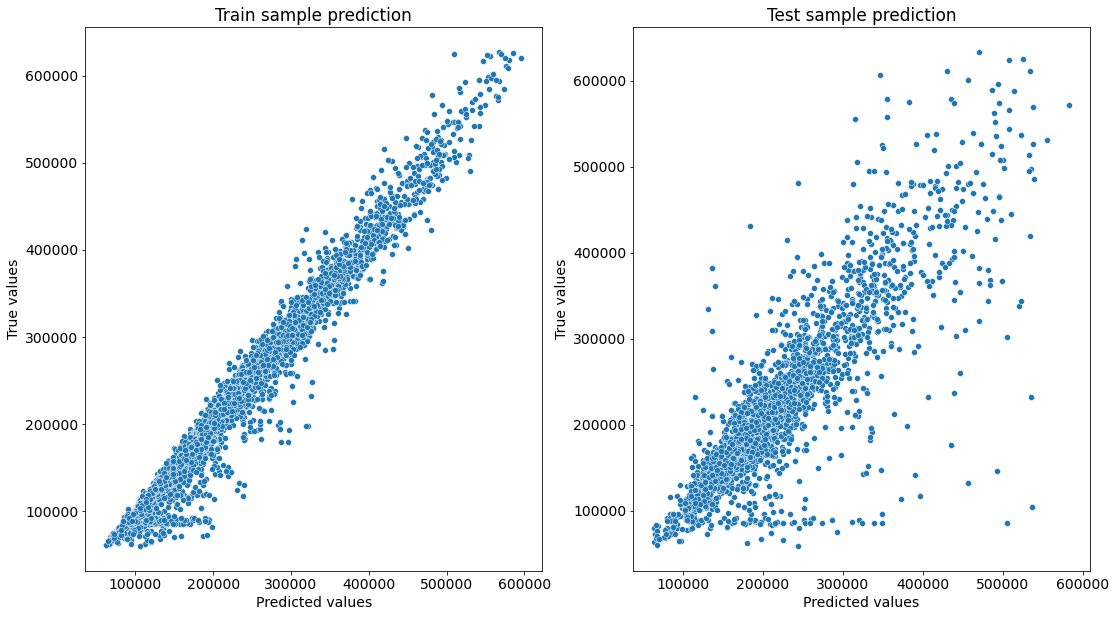

In [86]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

In [87]:
cv_score = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.71055045, 0.73093805, 0.78948495])

In [88]:
cv_score.mean()

0.743657815334921

Важность признаков

In [89]:
feature_importances = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False)

,feature_name,importance
1,Square,0.417149
17,MedSqPriceByDistrict,0.330066
2,LifeSquare,0.031444
0,Rooms,0.031059
18,MedPriceByFloorYear,0.026671
6,HouseYear,0.022165
5,HouseFloor,0.020276
11,Social_2,0.018909
4,Floor,0.016784
10,Social_1,0.014847


In [90]:
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
gb = GradientBoostingRegressor()
stack = StackingRegressor([('lr', lr), ('rf', rf_model)], final_estimator=gb)
stack.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf', RandomForestRegressor(random_state=21))],
                  final_estimator=GradientBoostingRegressor())

Train R2:	0.935
Test R2:	0.739


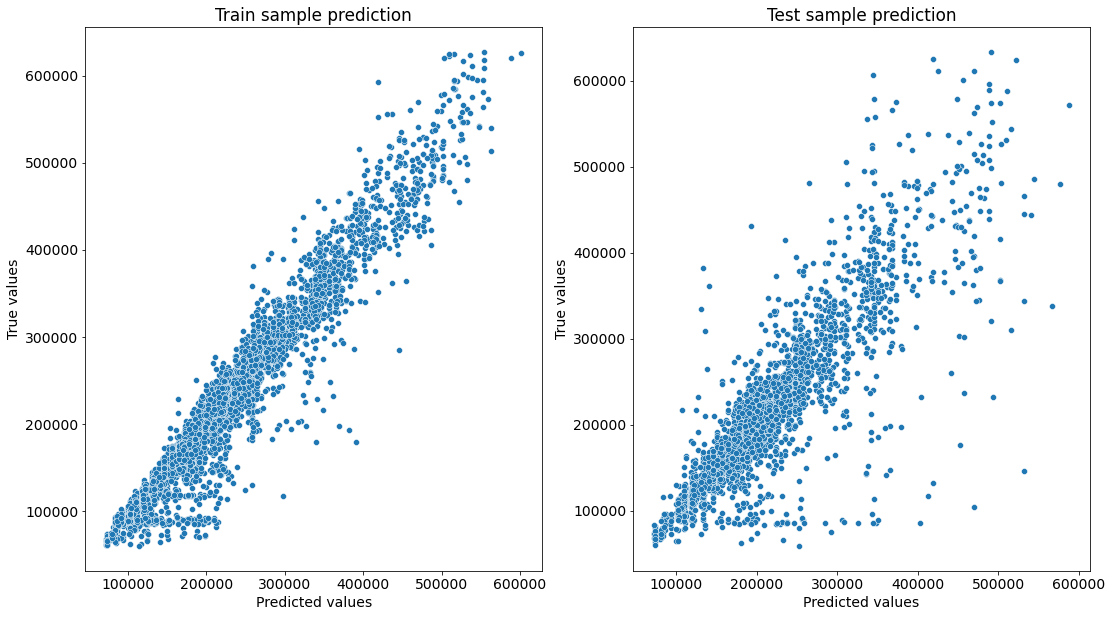

In [91]:
y_train_preds = stack.predict(X_train)
y_test_preds = stack.predict(X_valid)

evaluate_preds(y_train, y_train_preds, y_valid, y_test_preds)

Прогнозирование на тестовом датасете

In [92]:
test_df.shape

(5000, 19)

In [93]:
test_df

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,DistrictSize,IsDistrictLarge,MedSqPriceByDistrict,MedPriceByFloorYear
0,1.0,36.847630,19.094183,5.0,5.0,9.0,1970,0.036122,1,1,24,4378,0,1,1,76.0,0,4541.313477,186141.968750
1,1.0,42.568134,32.568134,10.0,7.0,17.0,2017,0.072158,1,1,2,629,1,0,0,169.0,1,2733.378906,180042.906250
2,2.0,59.463676,50.463676,9.0,19.0,19.0,1977,0.211401,1,1,9,1892,0,0,1,609.0,1,2703.307861,179235.484375
3,3.0,49.646030,33.893826,6.0,2.0,2.0,1965,0.014073,1,1,2,475,0,0,0,392.0,1,2219.800781,179439.000000
4,1.0,53.837055,50.837055,3.0,8.0,17.0,1977,0.309479,1,1,35,7715,4,0,6,68.0,0,3354.030029,192125.203125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2.0,43.177521,30.339945,5.0,5.0,6.0,1962,0.069660,1,1,31,6119,4,1,2,59.0,0,3998.768555,186141.968750
4996,3.0,94.521461,84.521461,10.0,21.0,27.0,2018,0.060753,1,1,15,2787,2,0,7,26.0,0,4835.417969,193054.218750
4997,1.0,33.656723,19.003260,5.0,2.0,5.0,1966,0.038693,1,1,28,6533,1,2,5,57.0,0,4063.772461,179439.000000
4998,1.0,38.635155,20.976257,9.0,8.0,14.0,1970,0.089040,1,1,33,7976,5,0,11,42.0,0,4462.944824,192125.203125


In [94]:
submit = pd.read_csv('C:\\Users\\4а\\sample_submission.csv')
submit.head()

,Id,Price
0,4567,200000.0
1,5925,200000.0
2,960,200000.0
3,3848,200000.0
4,746,200000.0


In [95]:
predictions = rf_model.predict(test_df)
predictions

array([153775.25515625, 122265.68742188, 140465.51210938, ...,
       149020.23929687, 187659.9234375 , 267476.14984375])

In [96]:
submit['Price'] = predictions
submit.head()

,Id,Price
0,4567,153775.255156
1,5925,122265.687422
2,960,140465.512109
3,3848,130969.624844
4,746,177477.703594


In [97]:
submit.to_csv('COURSE_PROJECT_submit.csv', index=False)